In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
import scipy.stats as stats

In [201]:
data = pd.read_csv('/content/sample_data/DataClustering.csv')

In [202]:
data.head()

,x1,x2,x3,x4
0,0.832354,1.389428,0.962226,0.993671
1,1.256087,1.500487,0.904118,0.738035
2,0.976953,1.058524,1.217530,1.357238
3,1.014365,1.122684,1.195847,0.984144
4,1.041386,1.219014,0.864819,1.720825


In [203]:
data.shape

(351, 4)

In [204]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      351 non-null    float64
 1   x2      351 non-null    float64
 2   x3      351 non-null    float64
 3   x4      351 non-null    float64
dtypes: float64(4)
memory usage: 11.1 KB


In [205]:
data.columns

Index(['x1', 'x2', 'x3', 'x4'], dtype='object')

In [206]:
columns = ['x1', 'x2', 'x3', 'x4']
print(columns)

['x1', 'x2', 'x3', 'x4']


In [207]:
#unique and null values 
for col in data.columns.values:
  list_vals = pd.unique(data[col]) #list of unique values
  print('\033[1m' + col + '\033[0m' + ' has ' + str(len(list_vals))  +' unique values, ' + '\033[1m' + str(data[col].isna().sum()) + '\033[0m' + ' null entries and datatype ' + '\033[1m' + str(data[col].dtype) + '\033[0m')
  if len(list_vals) < 10:
    list_str = ''
    for n in range(0, len(list_vals)):
      list_str = list_str + str(list_vals[n]) + ', '
    print('\033[1m' + '    ##### These are: '+ '\033[0m' +list_str[0:len(list_str) - 2])

x1 has 351 unique values, 0 null entries and datatype float64
x2 has 351 unique values, 0 null entries and datatype float64
x3 has 351 unique values, 0 null entries and datatype float64
x4 has 351 unique values, 0 null entries and datatype float64


In [208]:
data.describe()

,x1,x2,x3,x4
count,351.000000,351.000000,351.000000,351.000000
mean,0.278820,0.472738,1.643857,1.482918
std,0.341446,0.511023,1.668052,0.964016
min,0.048604,0.047022,0.367717,0.232562
25%,0.111341,0.115257,0.815180,0.857948
50%,0.153383,0.165684,1.083528,1.190996
75%,0.212564,0.854725,1.557597,1.724461
max,2.037125,2.476118,12.635585,7.726843


##Data Visualization

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


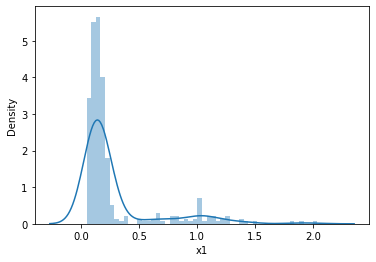

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


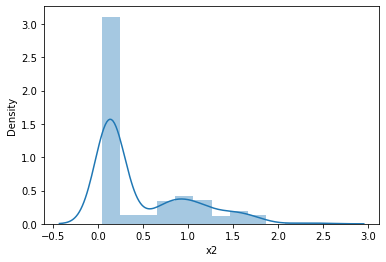

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


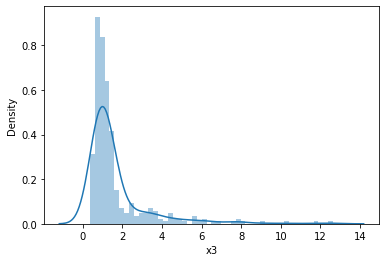

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


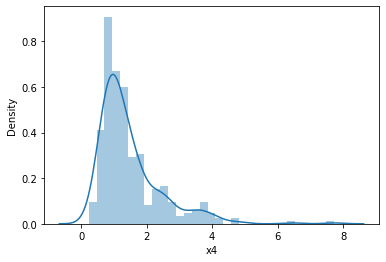

In [209]:
from matplotlib import pyplot as plt
for col in data.columns.values:
  sn.distplot(data[col])
  plt.show()

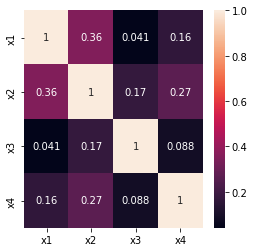

In [210]:
# visualization of correlation 
corr = data.corr(method = 'spearman')
fig, ax = plt.subplots(figsize = (4,4))
sn.heatmap(abs(corr), annot = True)
plt.show()

##Data Pre-Processing

In [211]:
def diagnostic_plots(data,x):
  plt.figure(figsize = (15,6))
  plt.subplot(1,2,1)
  data[x].hist()
  plt.subplot(1,2,2)
  stats.probplot(data[x], dist = "norm" , plot = plt)
  plt.show()

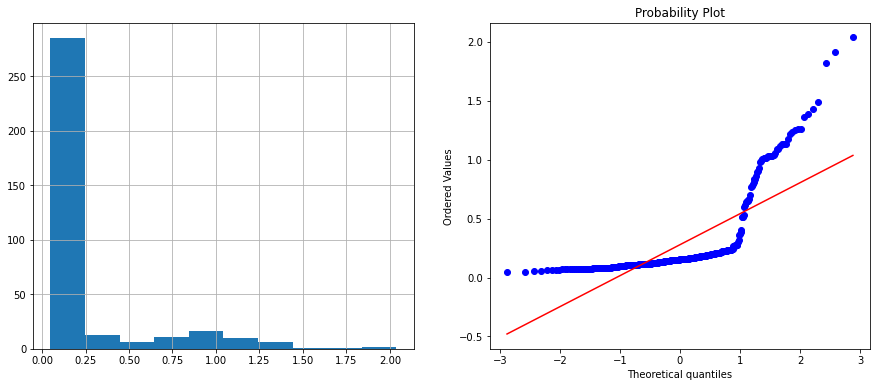

In [212]:
diagnostic_plots(data,'x1')

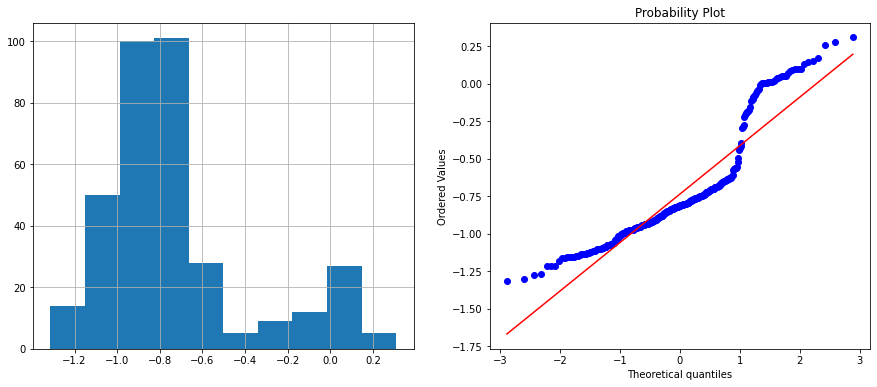

In [213]:
data['e_x1'] = np.log10(data['x1'])
diagnostic_plots(data,'e_x1')

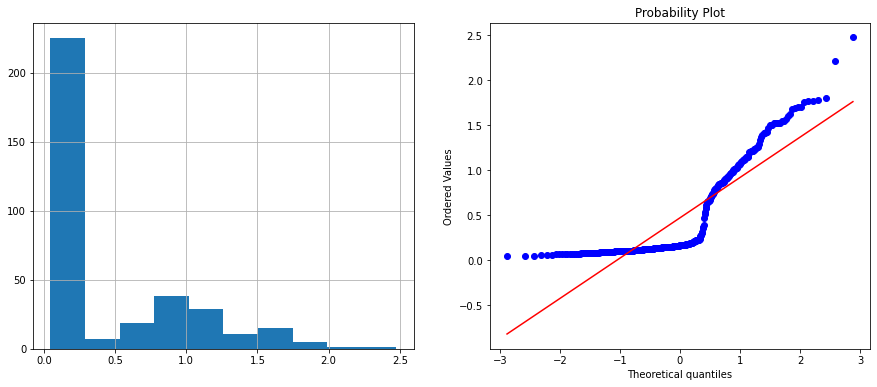

In [214]:
diagnostic_plots(data,'x2')

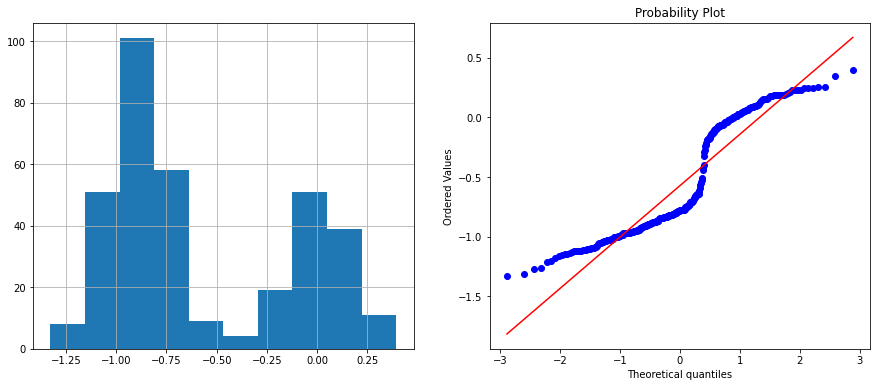

In [215]:
data['e_x2'] = np.log10(data['x2'])
diagnostic_plots(data,'e_x2')

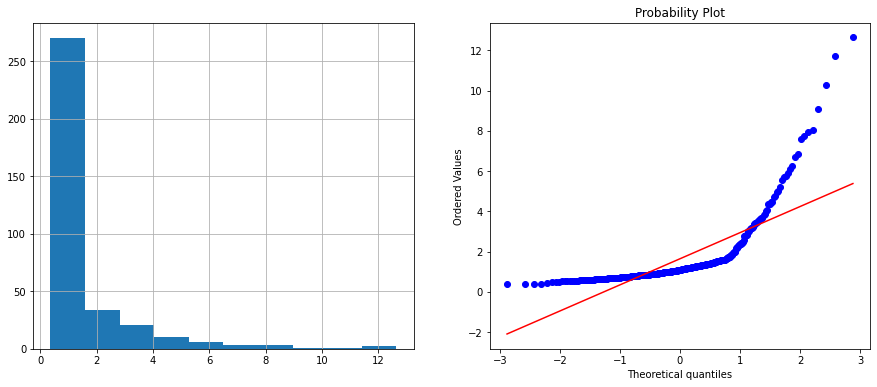

In [216]:
diagnostic_plots(data,'x3')

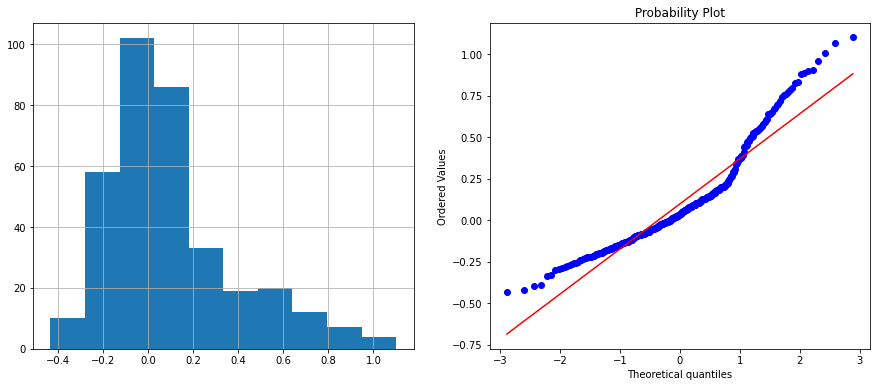

In [217]:
data['e_x3'] = np.log10(data['x3'])
diagnostic_plots(data,'e_x3')

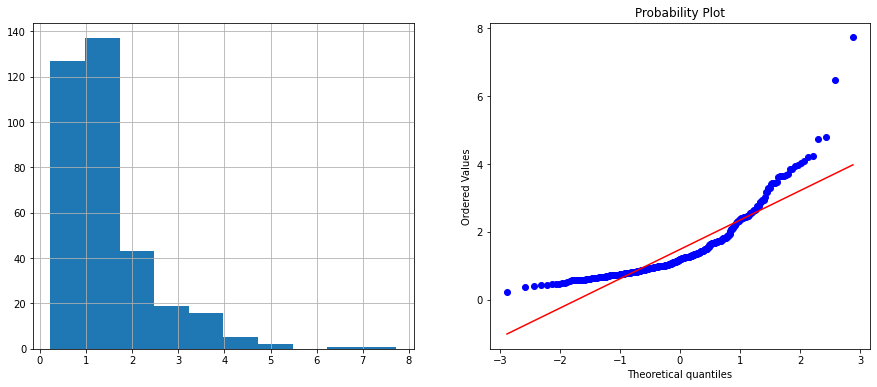

In [218]:
diagnostic_plots(data,'x4')

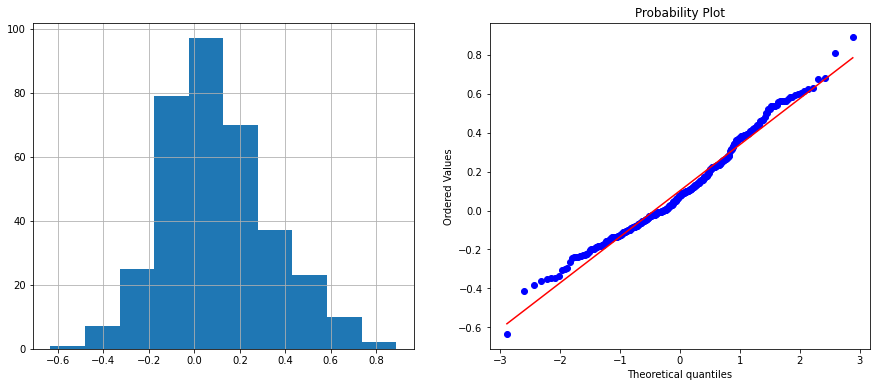

In [219]:
data['e_x4'] = np.log10(data['x4'])
diagnostic_plots(data,'e_x4')

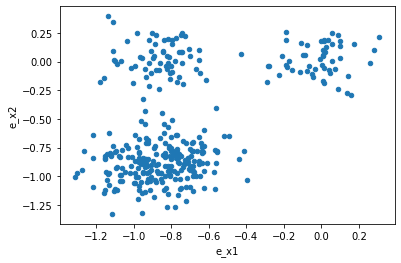

In [220]:
data.plot(kind = 'scatter', x = 'e_x1',y = 'e_x2');
plt.show()

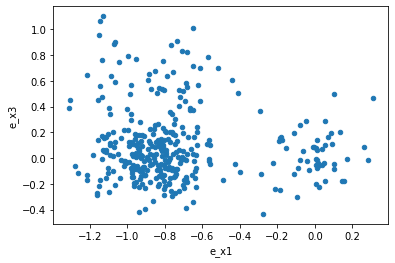

In [221]:
data.plot(kind = 'scatter', x = 'e_x1',y = 'e_x3');
plt.show()

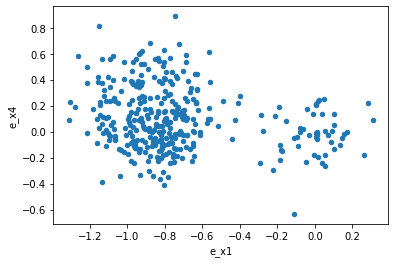

In [222]:
data.plot(kind = 'scatter', x = 'e_x1',y = 'e_x4');
plt.show()

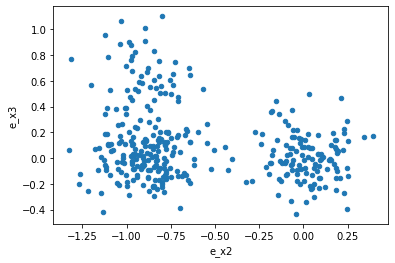

In [223]:
data.plot(kind = 'scatter', x = 'e_x2',y = 'e_x3');
plt.show()

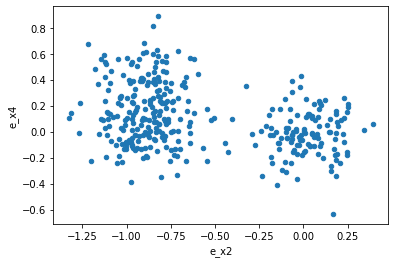

In [224]:
data.plot(kind = 'scatter', x = 'e_x2',y = 'e_x4');
plt.show()

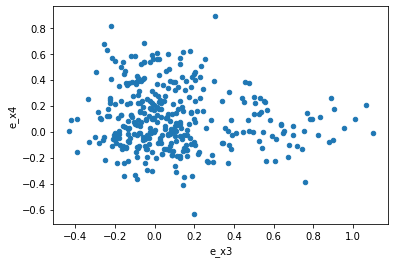

In [225]:
data.plot(kind = 'scatter', x = 'e_x3',y = 'e_x4');
plt.show()

In [226]:
data.head()

,x1,x2,x3,x4,e_x1,e_x2,e_x3,e_x4
0,0.832354,1.389428,0.962226,0.993671,-0.079692,0.142836,-0.016723,-0.002757
1,1.256087,1.500487,0.904118,0.738035,0.099020,0.176232,-0.043775,-0.131923
2,0.976953,1.058524,1.217530,1.357238,-0.010126,0.024701,0.085480,0.132656
3,1.014365,1.122684,1.195847,0.984144,0.006194,0.050257,0.077675,-0.006941
4,1.041386,1.219014,0.864819,1.720825,0.017612,0.086009,-0.063075,0.235737


In [227]:
data1 = data.drop(['x1','x2','x3','x4'],axis=1)
data1.head()

,e_x1,e_x2,e_x3,e_x4
0,-0.079692,0.142836,-0.016723,-0.002757
1,0.099020,0.176232,-0.043775,-0.131923
2,-0.010126,0.024701,0.085480,0.132656
3,0.006194,0.050257,0.077675,-0.006941
4,0.017612,0.086009,-0.063075,0.235737


## k means clustering

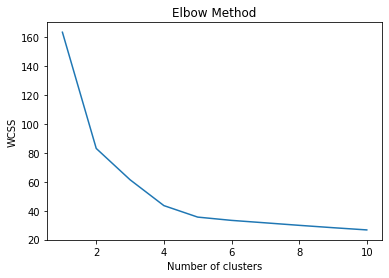

In [228]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data1)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

so we are getting sharp elbow at k=2, k=4 and k=5, so it creates a confusion regarding taking proper value of k

In [229]:
# # define and map colors
# colors = ['#DF2020', '#81DF20', '#2095DF']
# data1['c'] = df.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})
# plt.scatter(data1, c=df.c, alpha = 0.6, s=10)

In [230]:
# Silhoute's Method

In [231]:
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_score(data, kmeans.labels_)

0.09684349876691904

In [232]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(data) for k in range(1,10)]
silhouette_scores  = [silhouette_score(data, model.labels_) for model in kmeans_per_k[1:]]

In [233]:
print(silhouette_scores)

[0.5845000763505325, 0.38250695193757606, 0.40344396087241646, 0.3818138246641818, 0.3855123577203109, 0.39205316999804224, 0.3760114859707123, 0.37606877576377623]


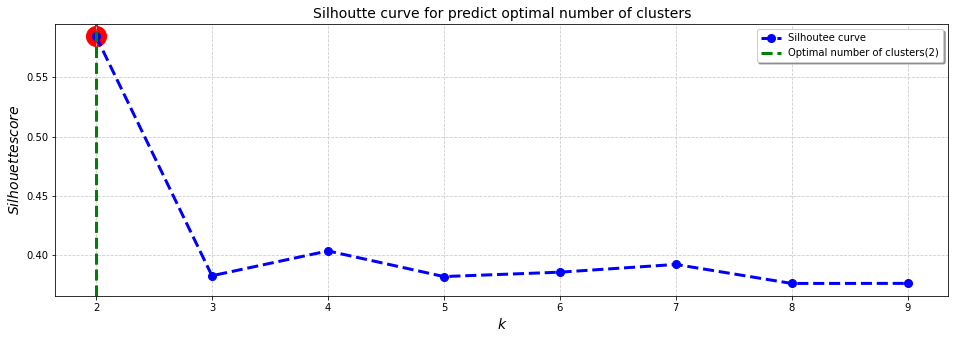

In [234]:
#Plotting the silhoutee score graph
from pylab import rcParams
rcParams['figure.figsize'] = 16, 5
plt.plot(range(2,10), silhouette_scores, "bo--", color = 'blue', linewidth=3, markersize=8, label='Silhoutee curve')
plt.xlabel("$k$", fontsize = 14, family = 'Arial')
plt.ylabel("$Silhouette score$", fontsize = 14, family = 'Arial')
plt.grid(which='major', color='#cccccc', linestyle='--')
plt.title('Silhoutte curve for predict optimal number of clusters', family='Arial', fontsize=14)

#Calculate number of Clusters
k = np.argmax(silhouette_scores)+2

#Draw a vertical line to mark optimal number of clusters
plt.axvline(x=k, linestyle='--', c='green', linewidth=3, label='Optimal number of clusters({})'.format(k))
plt.scatter(k, silhouette_scores[k-2], c='red', s=400)
plt.legend(shadow=True)
plt.show()

In [235]:
#predict the labels of clusters.
km=KMeans(n_clusters=2,init='k-means++',random_state=0)
label = km.fit_predict(data1)
y=label

In [236]:
y1=data1[label==0];y2=data1[label==1]

In [239]:
# plt.scatter(data1[0],data1[1])

## DBSCAN

In [240]:
from sklearn.preprocessing import StandardScaler

In [241]:
data1 = StandardScaler().fit_transform(data1)

In [242]:
print(data1)

[[ 1.89424203  1.56511437 -0.40751579 -0.43845215]
 [ 2.41013978  1.6380821  -0.50317506 -0.9824951 ]
 [ 2.09506138  1.30699788 -0.04611686  0.13190639]
 ...
 [-0.81524501 -0.863918   -0.4323532   1.83027114]
 [-0.62386411 -0.67588521 -0.20351956  1.09332909]
 [-0.5985845   0.05797759  0.07595381  0.30786994]]


In [243]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps = 0.8, min_samples = 4)

In [244]:
model = dbscan.fit(data1)

In [245]:
labels = model.labels_

In [246]:
from sklearn import metrics

In [247]:
sample_cores = np.zeros_like(labels,dtype = bool)

In [248]:
sample_cores[dbscan.core_sample_indices_]=True

In [249]:
n_clusters = len(set(labels))

In [250]:
print(n_clusters)

3


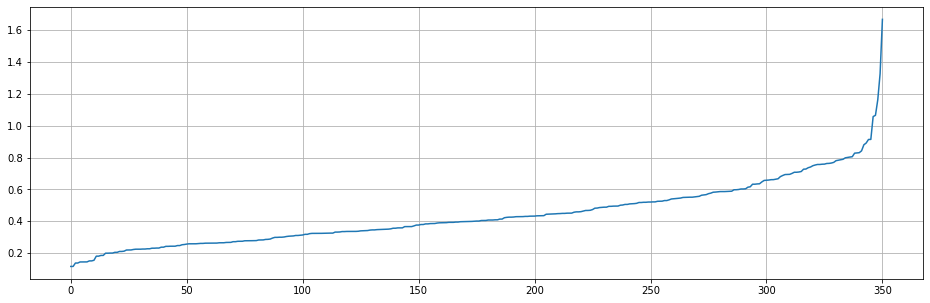

In [251]:
#Step 1. epsilon hyperparameter tuning
#Using the elbow point i.e. the point of the maximum curvature
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(data1)
distances, indices = nbrs.kneighbors(data1)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
#plt.plot(distances)
indices[:,1].shape
plt.plot(indices[:,0], distances)
plt.grid()

In [252]:
##interpretation of the epsilon
!pip install kneed
from kneed import KneeLocator
kn = KneeLocator(indices[:,0], distances, curve='convex', direction='increasing')
#import scipy.interpolate as interp  
#np.interp(kn.knee,indices[:,0], distances) #this gives the corrosponding $\epsilon$ value corrosponding to indice

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [253]:
##Clustering using the DBSCAN
m = DBSCAN(eps=0.6, min_samples=4)
label_db = m.fit_predict(data1)
np.unique(label_db) # checking the no

array([-1,  0,  1,  2,  3,  4])

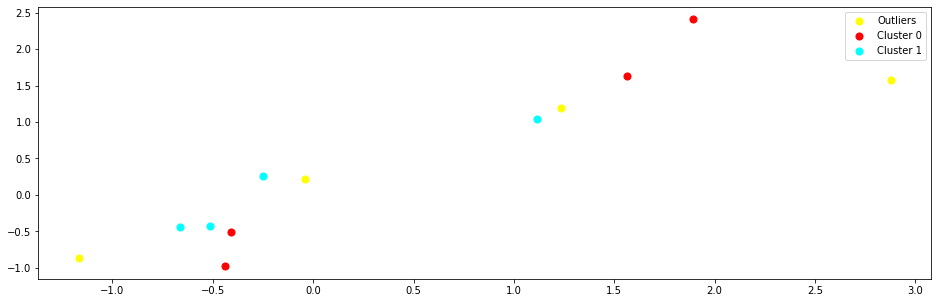

In [254]:
y1=data1[label_db==-1];y2=data1[label_db==0];y3=data1[label_db==1];
# y4=data1[label_db==2];y5=data1[label_db==3];y6=data1[label_db==4]
plt.scatter(y1[0],y1[1], s=50, c='yellow', label ='Outliers')
plt.scatter(y2[0],y2[1], s=50, c='red', label ='Cluster 0')
plt.scatter(y3[0],y3[1], s=50, c='cyan', label ='Cluster 1')
# plt.scatter(y4[0],y4[1], s=50, c='magenta', label ='Cluster 2')
# plt.scatter(y5[0],y5[1], s=50, c='pink', label ='Cluster 3')
# plt.scatter(y6[0],y6[1], s=50, c='blue', label ='Cluster 4')
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 351 samples in 0.001s...
[t-SNE] Computed neighbors for 351 samples in 0.009s...
[t-SNE] Computed conditional probabilities for sample 351 / 351
[t-SNE] Mean sigma: 0.628714
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.370380
[t-SNE] KL divergence after 300 iterations: 0.471396
No in legends corrosponds to the cluster nos.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


ValueError: ignored

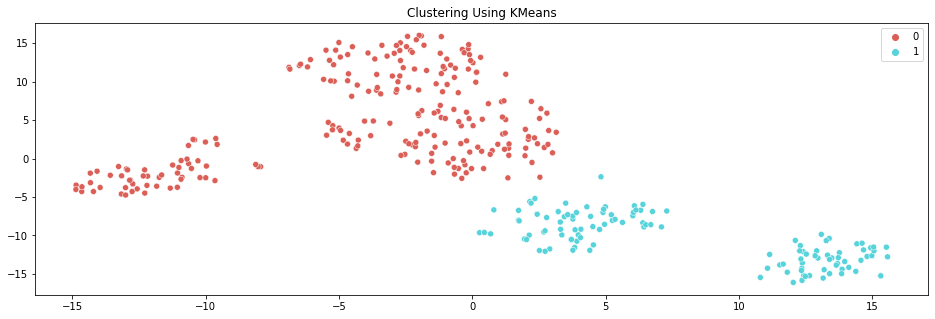

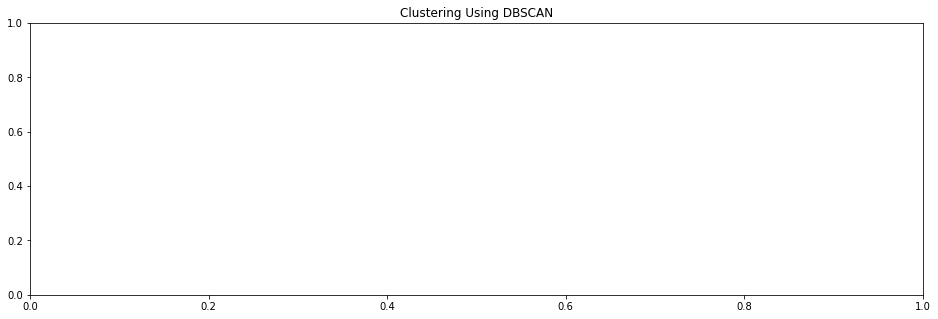

In [260]:
#Visualisation of the data using tsne
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=300, random_state=1)
tsne_results = tsne.fit_transform(data1)

x = tsne_results[:,0]
y = tsne_results[:,1]
target=label_db

plt.figure(1)
plt.title('Clustering Using KMeans')
sn.scatterplot( x, y, hue= label, palette=sn.color_palette("hls",2 ), data=data1)
print('No in legends corrosponds to the cluster nos.')
plt.figure(2)
plt.title('Clustering Using DBSCAN')
sn.scatterplot( x, y, hue= label_db, palette=sn.color_palette("hls",4 ), data=data1) 
print('-1 corrosponds to the outliers and rest are clusters')

##PCA

In [261]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [264]:
df_pca =  pd.read_csv('/content/sample_data/DataPCA.csv')
df_pca.head()

,x1,x2,x3,x4,x5,x6,x7
0,0.840261,-1.088160,4.861744,4.273055,4.312457,-0.137834,0.076453
1,1.320591,-1.174113,5.247360,3.295027,4.283410,-0.363759,-0.170605
2,1.537909,-1.175882,5.556251,3.394183,3.971574,-0.888398,0.080617
3,0.363552,-1.130608,4.329890,5.547488,4.539732,0.342330,0.251953
4,1.567938,-1.114719,5.542104,2.493071,4.156157,-0.609694,-0.291367


In [265]:
#unique and null values 
for col in df_pca.columns.values:
  list_vals = pd.unique(df_pca[col]) #list of unique values
  print('\033[1m' + col + '\033[0m' + ' has ' + str(len(list_vals))  +' unique values, ' + '\033[1m' + str(df_pca[col].isna().sum()) + '\033[0m' + ' null entries and datatype ' + '\033[1m' + str(df_pca[col].dtype) + '\033[0m')
  if len(list_vals) < 10:
    list_str = ''
    for n in range(0, len(list_vals)):
      list_str = list_str + str(list_vals[n]) + ', '
    print('\033[1m' + '    ##### These are: '+ '\033[0m' +list_str[0:len(list_str) - 2])

x1 has 190 unique values, 0 null entries and datatype float64
x2 has 190 unique values, 0 null entries and datatype float64
x3 has 190 unique values, 0 null entries and datatype float64
x4 has 190 unique values, 0 null entries and datatype float64
x5 has 190 unique values, 0 null entries and datatype float64
x6 has 190 unique values, 0 null entries and datatype float64
x7 has 190 unique values, 0 null entries and datatype float64


In [266]:
df_pca.describe()

,x1,x2,x3,x4,x5,x6,x7
count,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000
mean,1.286644,-1.135656,5.254907,3.342504,4.233765,-0.412937,-0.119058
std,0.508765,0.233921,0.549171,0.995603,0.328327,0.482069,0.239692
min,-0.074116,-1.734167,3.967657,0.649854,3.306106,-1.936695,-0.786517
25%,0.928244,-1.298233,4.883782,2.645102,4.020569,-0.741547,-0.278181
50%,1.271034,-1.145689,5.249568,3.400840,4.242064,-0.377963,-0.122850
75%,1.637682,-0.997318,5.625487,3.996560,4.463035,-0.096413,0.036964
max,2.504835,-0.440730,6.857529,5.817673,5.056247,0.823165,0.526882


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f50b87e3c10>,
      dtype=object)

<Figure size 1152x360 with 0 Axes>

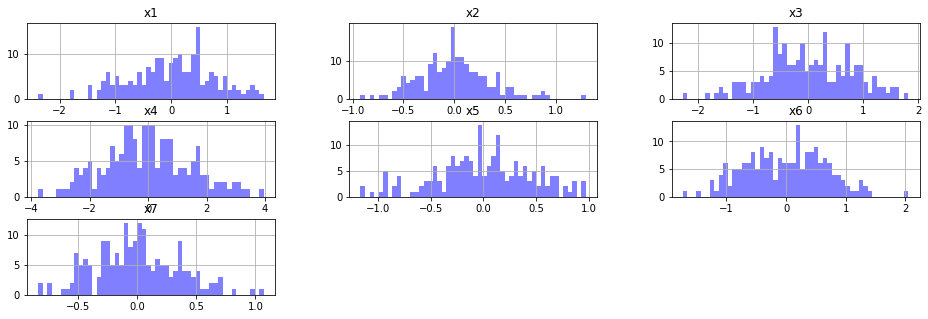

In [267]:
#Checking the data distribution of the variables
plt.figure()
df_pca.diff().hist(color="b", alpha=0.5, bins=50)

In [268]:
#Apply Standard Scaling
col=df_pca.columns
feature=col.tolist()

sc=StandardScaler()  #as the PCA requirement making the mean as the origin i.e shifting the axis
X=sc.fit_transform(df_pca) 
X=pd.DataFrame(X,columns=feature) #retaining the column names

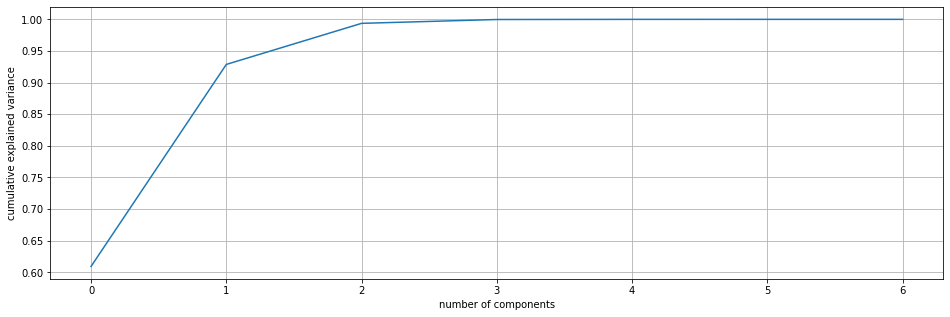

In [269]:
#Plotting of the cumulative variance vs the no. of components
pca=PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_)) #cumulative sum of the variances
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.grid()
#np.cumsum(PCA().fit(X).explained_variance_ratio_).dtype

In [270]:
#taking the no of components as 4 as observed from above that the maximum variance is been covered upto 4 components
from numpy import linalg as LA
pca = PCA(n_components=4) 
Xd = pca.fit_transform(X)
Xd_reconstructed=pca.inverse_transform(Xd)
MSE_for_reduction_upto4_components=LA.norm((X-Xd_reconstructed),None)
MSE_for_reduction_upto4_components

0.5648350714629252

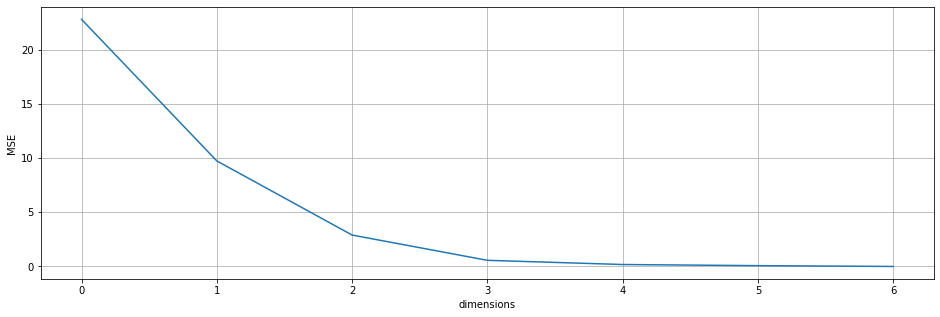

In [271]:
#MSError visualisation for the various no of dimensions for PCA
from numpy import linalg as LA
loss=[]
for i in range(1,8):
    pca = PCA(n_components=i)
    Xd = pca.fit_transform(X)
    Xd_reconstructed=pca.inverse_transform(Xd)
    total_loss=LA.norm((X-Xd_reconstructed),None)
    loss.append(total_loss)

# Plottting   
plt.ylabel('MSE')
plt.xlabel('dimensions')
plt.plot(loss)
plt.grid()

Part 3 Non-Linear Dimension Reduction


In [272]:
from sklearn.decomposition import KernelPCA
#from sklearn.model_selection import GridSearchCV
#from sklearn.pipeline import Pipeline

In [274]:
df_kpca = pd.read_csv('/content/sample_data/DataKPCA.csv')

In [275]:
#Visualisation of the data
# Check for unique and null values 
Xk=df_kpca #data copied in Xk
for col in Xk.columns.values:
  list_vals = pd.unique(Xk[col]) #list of unique values
  print('\033[1m' + col + '\033[0m' + ' has ' + str(len(list_vals))  +' unique values, ' + '\033[1m' + str(Xk[col].isna().sum()) + '\033[0m' + ' null entries and datatype ' + '\033[1m' + str(Xk[col].dtype) + '\033[0m')
  if len(list_vals) < 10:
    list_str = ''
    for n in range(0, len(list_vals)):
      list_str = list_str + str(list_vals[n]) + ', '
    print('\033[1m' + '    ##### These are: '+ '\033[0m' +list_str[0:len(list_str) - 2])

x1 has 190 unique values, 0 null entries and datatype float64
x2 has 190 unique values, 0 null entries and datatype float64
x3 has 190 unique values, 0 null entries and datatype float64
x4 has 190 unique values, 0 null entries and datatype float64
x5 has 190 unique values, 0 null entries and datatype float64
x6 has 190 unique values, 0 null entries and datatype float64
x7 has 190 unique values, 0 null entries and datatype float64


In [276]:
Xk.describe()

,x1,x2,x3,x4,x5,x6,x7
count,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000
mean,3.121555,14.985682,-47.909555,-8.811677,-2.175834,1.893953,1.958302
std,0.589013,1.298751,2.459375,2.337179,0.505819,0.159647,0.108756
min,1.964315,11.577329,-52.837231,-14.068488,-3.613443,1.750006,1.761394
25%,2.679532,14.087484,-49.736194,-10.392405,-2.512570,1.773690,1.880257
50%,3.039420,14.943396,-48.185549,-9.045948,-2.156469,1.852369,1.942348
75%,3.489341,15.764749,-46.405402,-7.235609,-1.828925,1.954614,2.018826
max,4.820967,18.747792,-40.772554,-1.907331,-0.972995,2.580983,2.332842


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f50b818c890>,
      dtype=object)

<Figure size 1152x360 with 0 Axes>

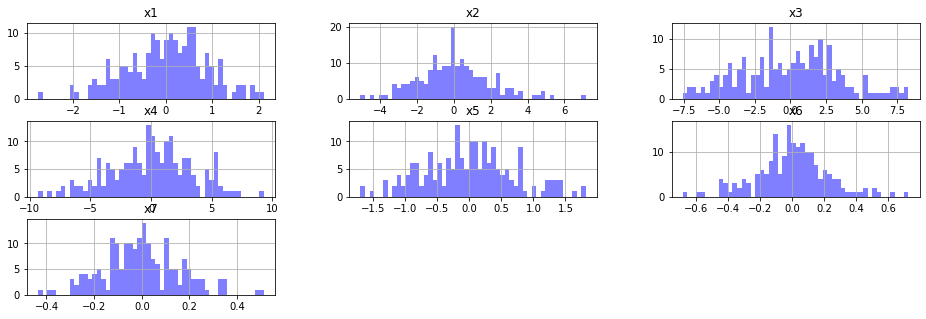

In [277]:
#Checking the data distribution of the variables
plt.figure()
Xk.diff().hist(color="b", alpha=0.5, bins=50)

In [278]:
#standardisation of the data using the standard scaler
#Apply Standard Scaling
col=df_kpca.columns
feature=col.tolist()
sc=StandardScaler()  #as the PCA requirement making the mean as the origin i.e shifting the axis
Xk=sc.fit_transform(Xk) 
Xk=pd.DataFrame(Xk,columns=feature)

Explained variance plotting in kpca


since we dont have any modeule as explained_variance ratio in sklearn.decomposition.KernelPCA so we will first transform using the kernel using the default n_components value as none, then we will apply the PCA to the kernelised input data.

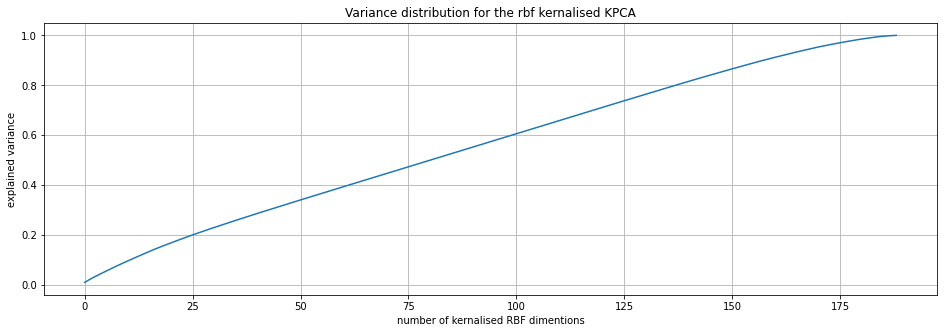

In [279]:
kpca = KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=10)
Xkpca_rbf = kpca.fit_transform(Xk)
pca=PCA().fit(Xkpca_rbf)
plt.plot(np.cumsum(pca.explained_variance_ratio_)) #cumulative sum of the variances
plt.title('Variance distribution for the rbf kernalised KPCA')
plt.xlabel('number of kernalised RBF dimentions')
plt.ylabel('explained variance')
plt.grid()

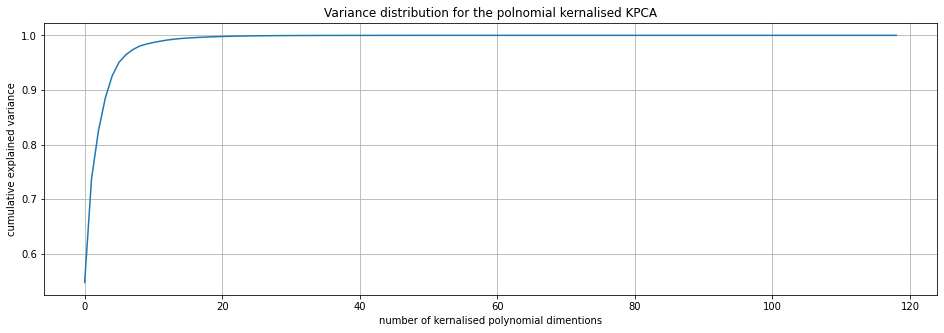

In [280]:
kpca = KernelPCA(kernel="poly", fit_inverse_transform=True, gamma=10)
Xkpca_poly = kpca.fit_transform(Xk)
pca=PCA().fit(Xkpca_poly)
plt.plot(np.cumsum(pca.explained_variance_ratio_)) #cumulative sum of the variances
plt.title('Variance distribution for the polnomial kernalised KPCA')
plt.xlabel('number of kernalised polynomial dimentions')
plt.ylabel('cumulative explained variance')
plt.grid()

In [281]:
#fitting the KPCA dim reduction with optimal dimentions in the data
kpca = KernelPCA(kernel="poly", fit_inverse_transform=True, gamma=10)
Xkpca_poly = kpca.fit_transform(Xk)
pca=PCA(n_components=40).fit(Xkpca_poly)
Xkpca_trans=pca.fit_transform(Xkpca_poly)
Xkpca_trans.shape
#X2=pca.inverse_transform(Xkpca_trans)

(190, 40)

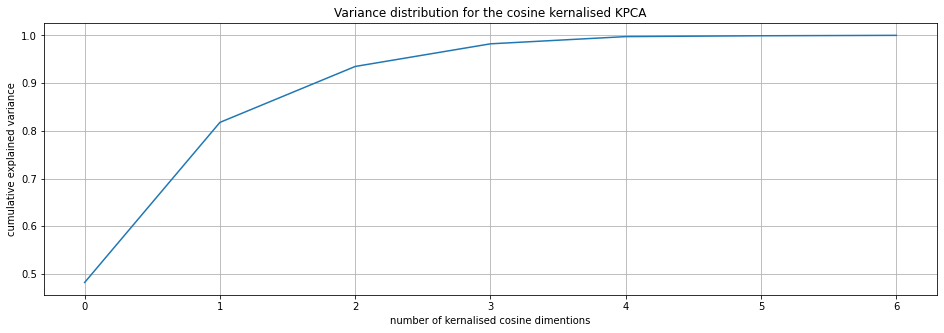

In [282]:
#KPCA with cosine kernel
kpca = KernelPCA(kernel="cosine", fit_inverse_transform=True, gamma=10)
Xkpca_cos = kpca.fit_transform(Xk)
pca=PCA().fit(Xkpca_cos)
plt.plot(np.cumsum(pca.explained_variance_ratio_)) #cumulative sum of the variances
plt.title('Variance distribution for the cosine kernalised KPCA')
plt.xlabel('number of kernalised cosine dimentions')
plt.ylabel('cumulative explained variance')
plt.grid()


Observations reg the applied Kernel

As we have applied the rbf cosine polynomial kernels out of which the better results were given by the polynomial kernel \ because as observed from the varince dist diagram of rbf there was no significant lower dimentions were available which were covering the higher variance ratio.